**Data Design Assignment**

Laptop Price Prediction

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

from math import sqrt
from pprint import pprint
from IPython.display import display
from scipy.spatial import ConvexHull
from matplotlib.pyplot import figure

from sklearn.metrics import r2_score
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split,RandomizedSearchCV


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
cd "D:\ArdenDocs\Modules\DataDesign\Assignment\LaptopPricePrediction"

D:\ArdenDocs\Modules\DataDesign\Assignment\LaptopPricePrediction


In [3]:
df = pd.read_csv("laptopPrice.csv")

In [4]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [6]:
df.shape

(823, 19)

In [7]:
df.columns.values

array(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice',
       'Price', 'rating', 'Number of Ratings', 'Number of Reviews'],
      dtype=object)

Check null values

In [8]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
818    False
819    False
820    False
821    False
822    False
Length: 823, dtype: bool

In [10]:
df.duplicated().sum()

21

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(802, 19)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              802 non-null    object
 1   processor_brand    802 non-null    object
 2   processor_name     802 non-null    object
 3   processor_gnrtn    802 non-null    object
 4   ram_gb             802 non-null    object
 5   ram_type           802 non-null    object
 6   ssd                802 non-null    object
 7   hdd                802 non-null    object
 8   os                 802 non-null    object
 9   os_bit             802 non-null    object
 10  graphic_card_gb    802 non-null    object
 11  weight             802 non-null    object
 12  warranty           802 non-null    object
 13  Touchscreen        802 non-null    object
 14  msoffice           802 non-null    object
 15  Price              802 non-null    int64 
 16  rating             802 non-null    object
 17  Nu

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


Exchanging currency from INR to EUR

In [16]:
# 

In [17]:
df['Price'] = df['Price']*0.011

In [18]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,381.139,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,428.989,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,439.989,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,769.890,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,296.890,3 stars,0,0


In [19]:
first_rows = df.head()



# Print the value and type of each column in the first rows
for column in first_rows.columns:
    column_values = first_rows[column]
    value = column_values.values[0]
    value_type = type(value).__name__
    print(f"Column: {column} - Value: {value} - Type: {value_type}\n")

Column: brand - Value: ASUS - Type: str

Column: processor_brand - Value: Intel - Type: str

Column: processor_name - Value: Core i3 - Type: str

Column: processor_gnrtn - Value: 10th - Type: str

Column: ram_gb - Value: 4 GB - Type: str

Column: ram_type - Value: DDR4 - Type: str

Column: ssd - Value: 0 GB - Type: str

Column: hdd - Value: 1024 GB - Type: str

Column: os - Value: Windows - Type: str

Column: os_bit - Value: 64-bit - Type: str

Column: graphic_card_gb - Value: 0 GB - Type: str

Column: weight - Value: Casual - Type: str

Column: warranty - Value: No warranty - Type: str

Column: Touchscreen - Value: No - Type: str

Column: msoffice - Value: No - Type: str

Column: Price - Value: 381.13899999999995 - Type: float64

Column: rating - Value: 2 stars - Type: str

Column: Number of Ratings - Value: 3 - Type: int64

Column: Number of Reviews - Value: 0 - Type: int64



Dropping uninmportant columns ("Number of Ratings","Number of Reviews")

In [20]:
df_1 = df.iloc[:,:17]

In [21]:
df_1.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,381.139,2 stars
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,428.989,3 stars
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,439.989,3 stars
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,769.890,3 stars
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,296.890,3 stars


In [22]:
df_1 = df_1.drop(["brand"],axis = 1)

In [23]:
#Replace catergorical features with dummies. using the label encoding for this purpose  

df_dummies = pd.get_dummies(df_1)

In [24]:
df_dummies.head()

,Price,processor_brand_AMD,processor_brand_Intel,processor_brand_M1,processor_name_Celeron Dual,processor_name_Core i3,processor_name_Core i5,processor_name_Core i7,processor_name_Core i9,processor_name_M1,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,381.139,False,True,False,False,True,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,428.989,False,True,False,False,True,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
2,439.989,False,True,False,False,True,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
3,769.890,False,True,False,False,False,True,False,False,False,...,True,True,False,True,False,False,False,True,False,False
4,296.890,False,True,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False


In [25]:
df_dummies.replace(to_replace=[True,False], value=[1, 0], inplace=True)
df_dummies

,Price,processor_brand_AMD,processor_brand_Intel,processor_brand_M1,processor_name_Celeron Dual,processor_name_Core i3,processor_name_Core i5,processor_name_Core i7,processor_name_Core i9,processor_name_M1,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,381.139,0,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
1,428.989,0,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
2,439.989,0,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
3,769.890,0,1,0,0,0,1,0,0,0,...,1,1,0,1,0,0,0,1,0,0
4,296.890,0,1,0,1,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,1495.890,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
819,1594.890,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
820,1649.890,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
821,1572.890,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [26]:
df_dummies.shape

(802, 70)

<Axes: >

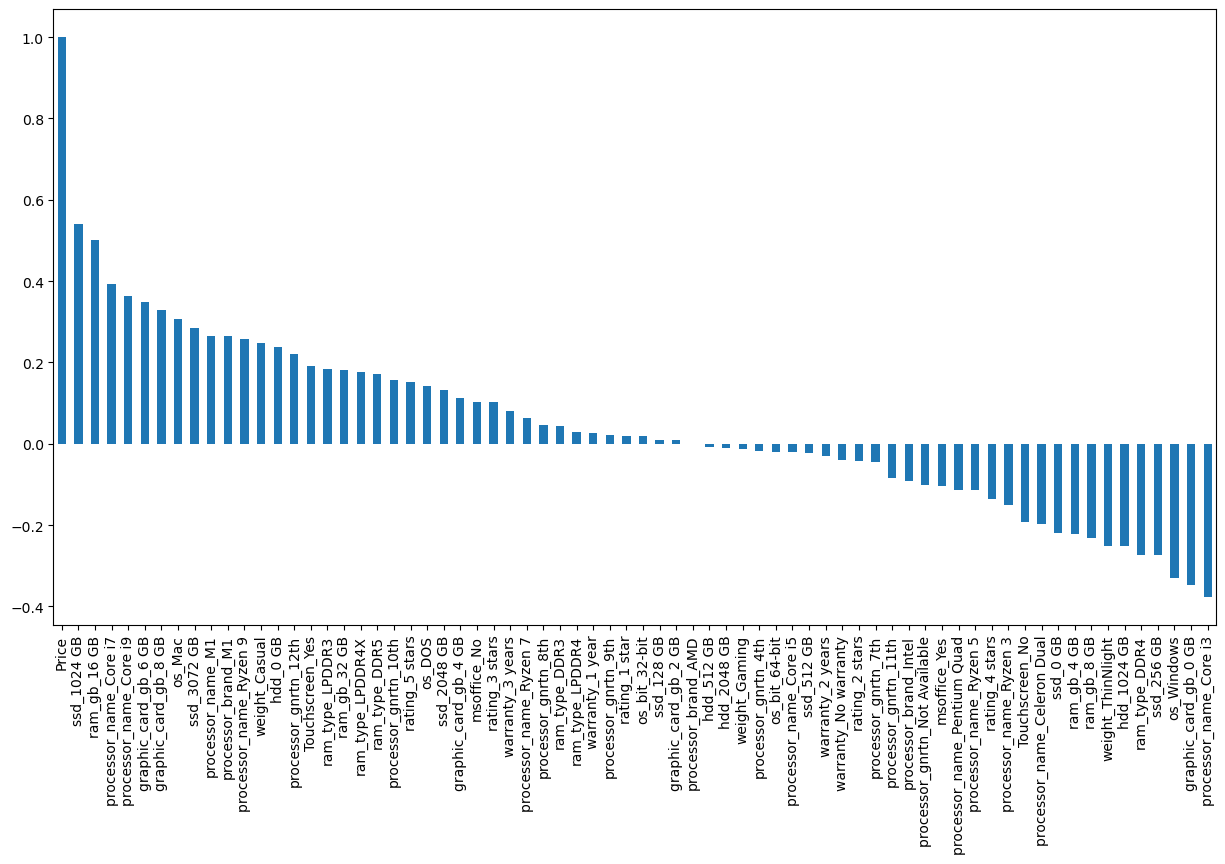

In [27]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Price'].sort_values(ascending = False).plot(kind='bar')

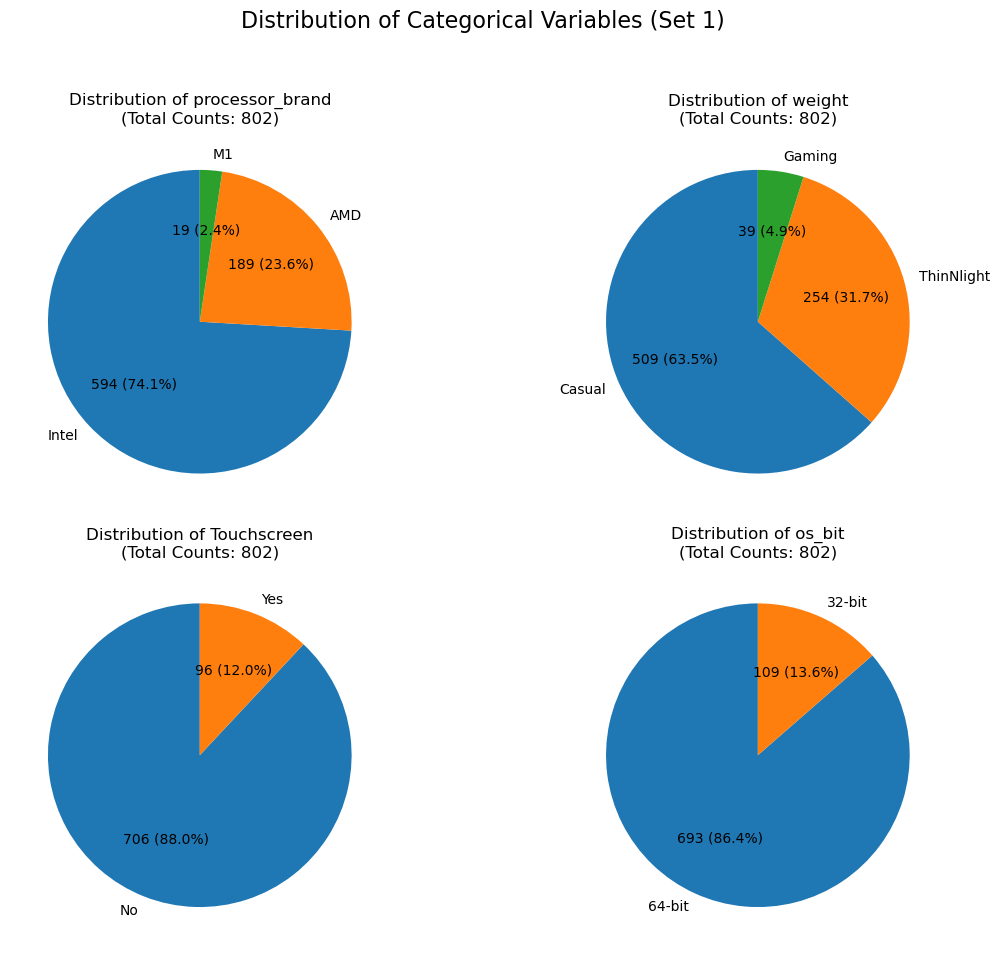

In [28]:
# Categorical Variables Pie Charts with Counts and Percentages
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Categorical Variables (Set 1)', fontsize=16)

axes = axes.flatten()

variables_set1 = ['processor_brand', 'weight', 'Touchscreen', 'os_bit']

for i, variable in enumerate(variables_set1):
    values_counts = df[variable].value_counts()
    labels = values_counts.index
    sizes = values_counts.values
    axes[i].pie(sizes, labels=labels, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(sizes) / 100, p), startangle=90)
    axes[i].set_title(f'Distribution of {variable}\n(Total Counts: {sum(sizes)})')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

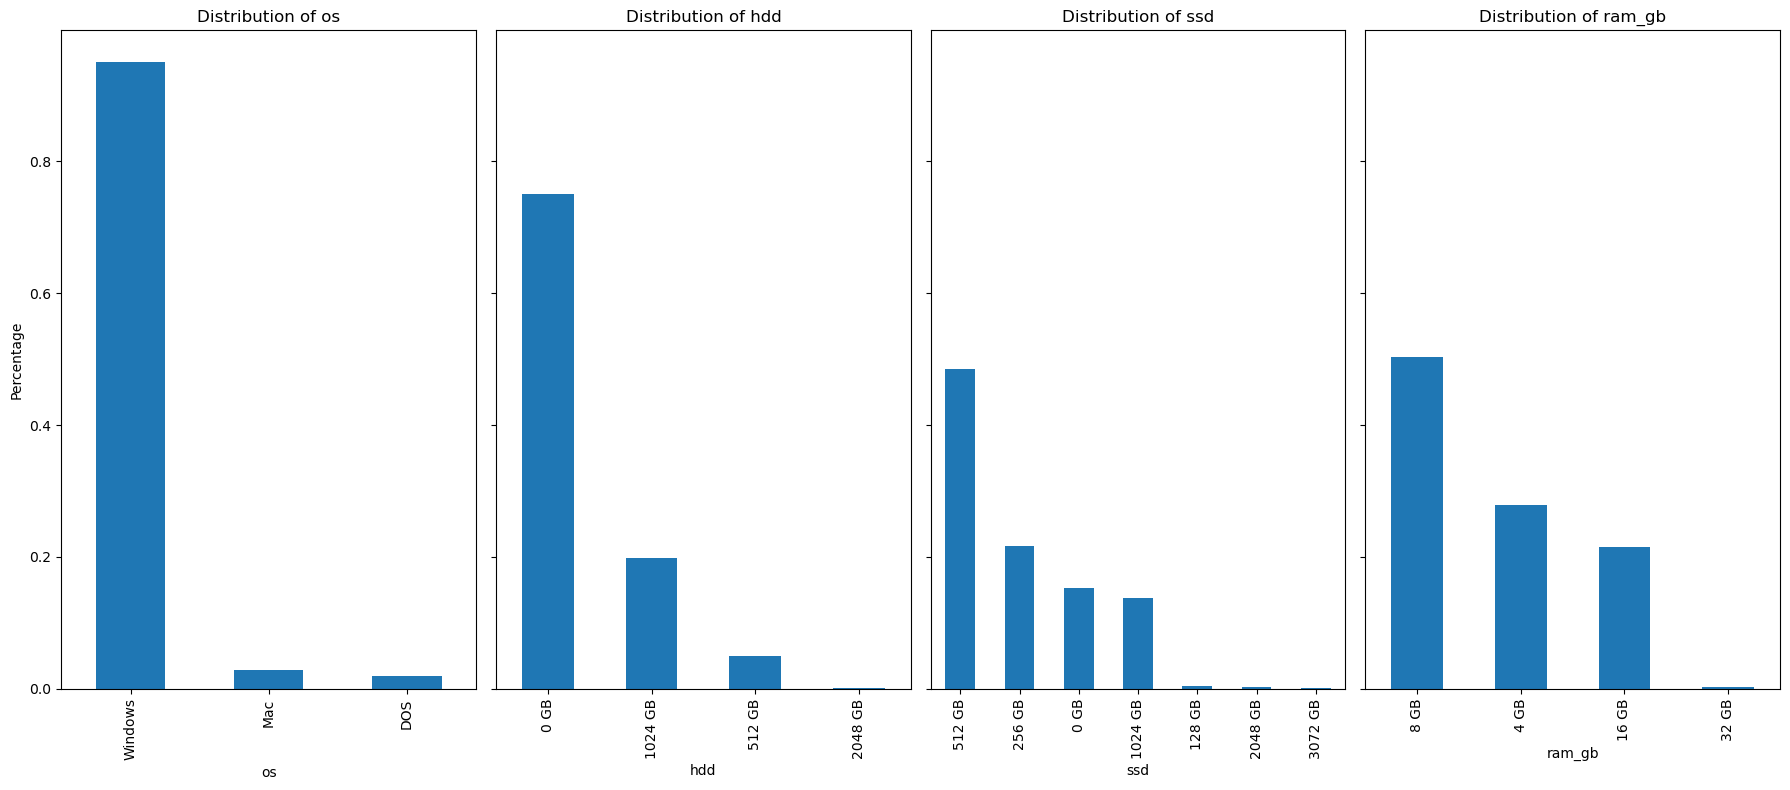

In [29]:
columns_to_plot = ['os', 'hdd', 'ssd', 'ram_gb']

fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(18, 8), sharey=True)

for i, column in enumerate(columns_to_plot):
    (df[column].value_counts() / len(df_dummies)).plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Percentage')

plt.tight_layout()

#plt.savefig("anyplot.png") #<-----------

plt.show()

In [30]:
pwd

'D:\\ArdenDocs\\Modules\\DataDesign\\Assignment\\LaptopPricePrediction'

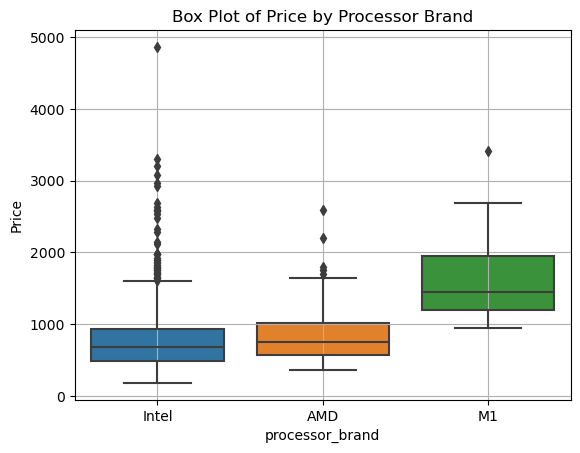

In [31]:
# Processor Brand-Price Box Plots

sns.boxplot(x='processor_brand', y='Price', data=df)
plt.title('Box Plot of Price by Processor Brand')
plt.grid()
plt.show()

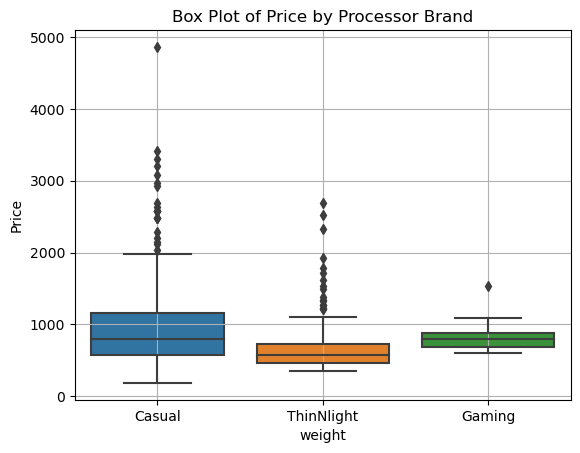

In [112]:
# Processor Brand-Price Box Plots

sns.boxplot(x='weight', y='Price', data=df)
plt.title('Box Plot of Price by Processor Brand')
plt.grid()
plt.show()

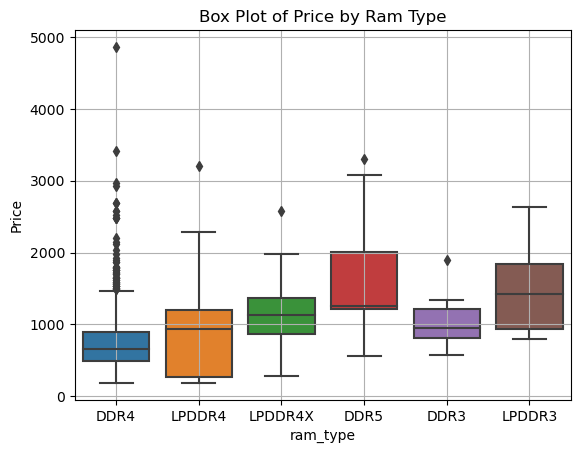

In [32]:
# Ram Type-Price Box Plots

sns.boxplot(x='ram_type', y='Price', data=df)
plt.title('Box Plot of Price by Ram Type')
plt.grid()

plt.show()

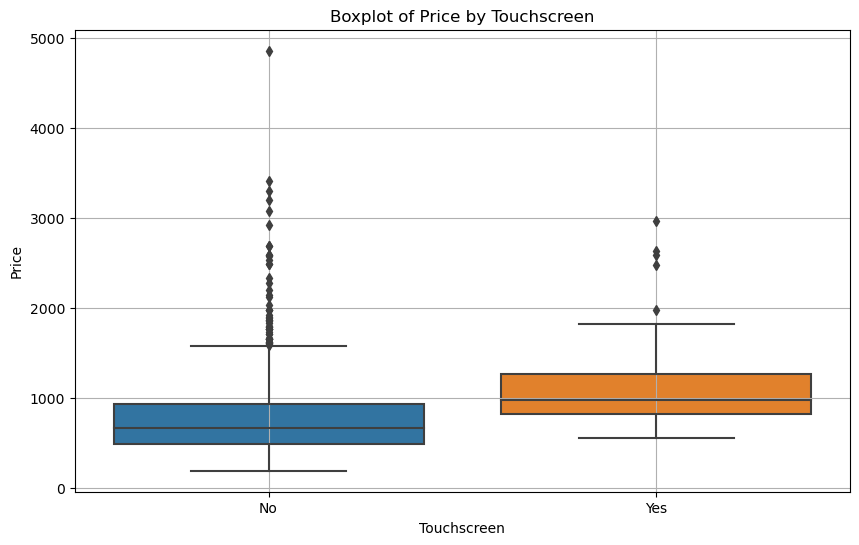

In [33]:
# Touchscreen Price Box Plots

plt.figure(figsize=(10, 6)) 

sns.boxplot(x='Touchscreen', y='Price', data=df)
plt.title('Boxplot of Price by Touchscreen')
plt.grid()

plt.show()

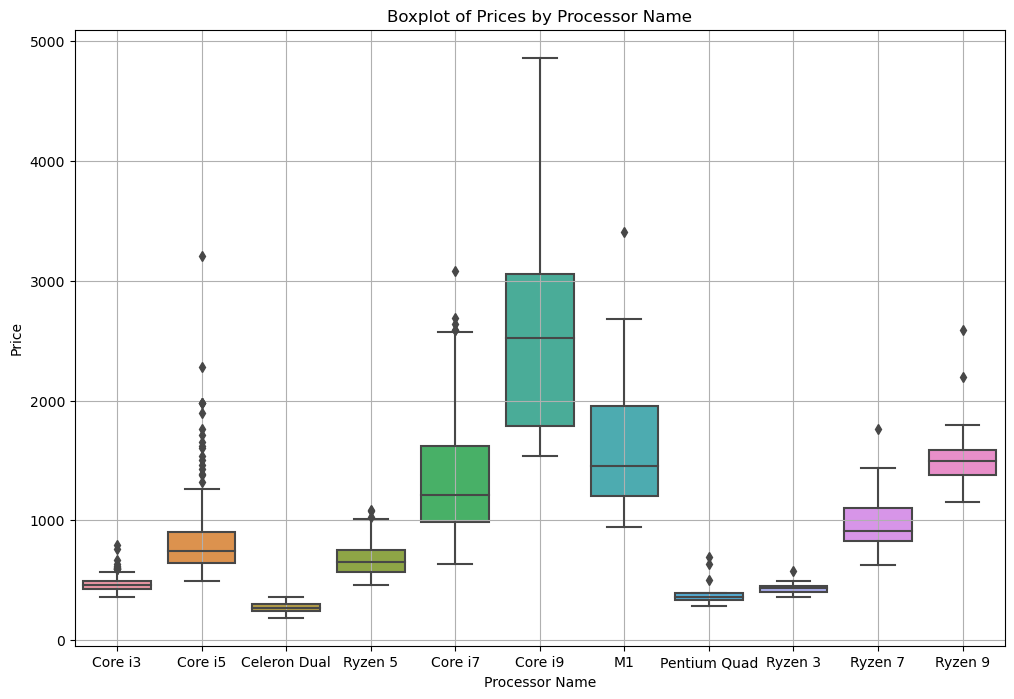

In [34]:
#Processor Brand-Price Box Plots
plt.figure(figsize=(12, 8))

sns.boxplot(x='processor_name', y='Price', data=df)
plt.title('Boxplot of Prices by Processor Name')
plt.xlabel('Processor Name')
plt.ylabel('Price')
plt.grid()
plt.show()

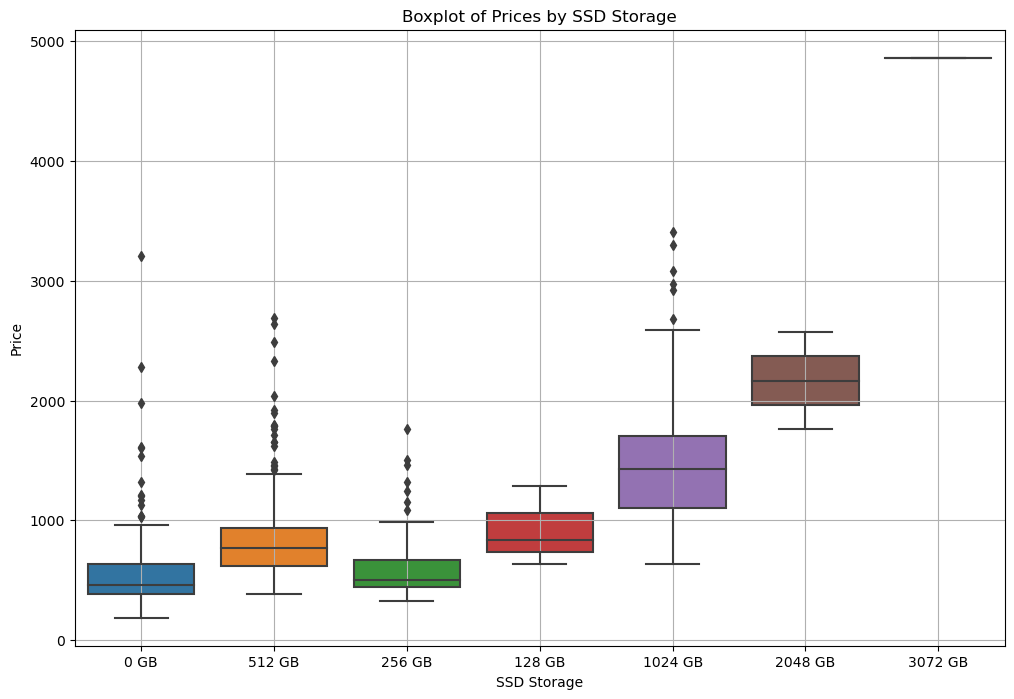

In [35]:
#Processor Brand-Price Box Plots
plt.figure(figsize=(12, 8))

sns.boxplot(x='ssd', y='Price', data=df)
plt.title('Boxplot of Prices by SSD Storage')
plt.xlabel('SSD Storage')
plt.ylabel('Price')
plt.grid()
plt.show()

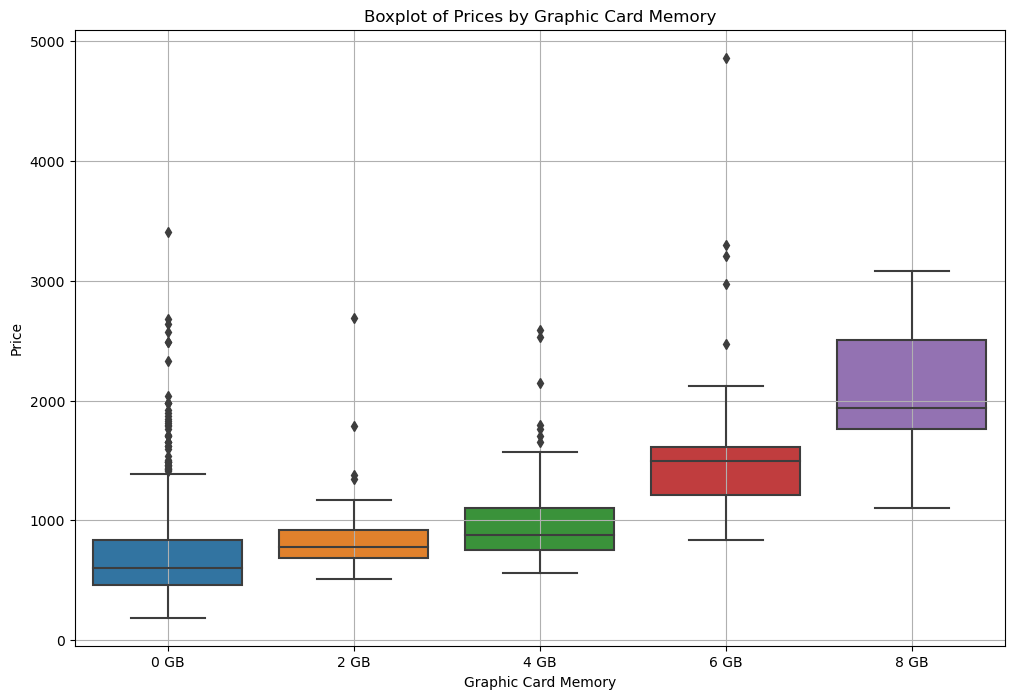

In [36]:
#Processor Brand-Price Box Plots
plt.figure(figsize=(12, 8))

sns.boxplot(x='graphic_card_gb', y='Price', data=df)
plt.title('Boxplot of Prices by Graphic Card Memory')
plt.xlabel('Graphic Card Memory')
plt.ylabel('Price')
plt.grid()
plt.show()

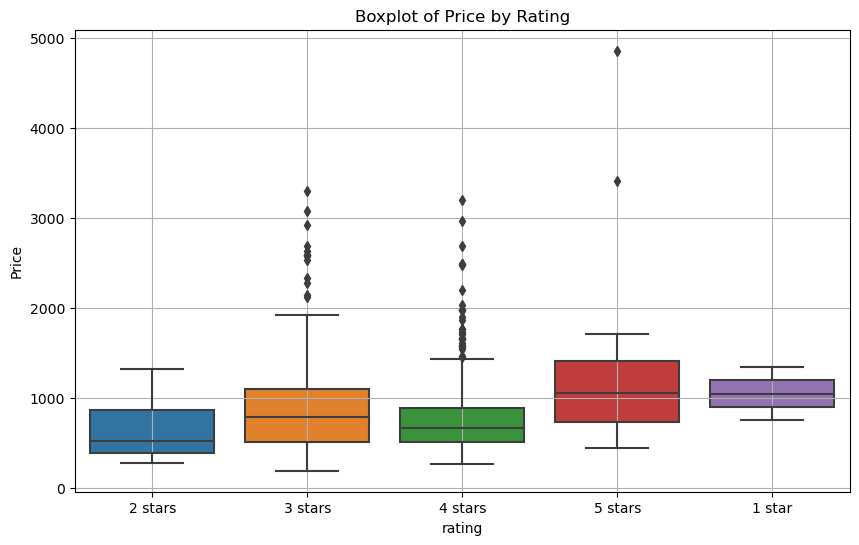

In [37]:
# Rating Price Box Plots

plt.figure(figsize=(10, 6)) 

sns.boxplot(x='rating', y='Price', data=df)
plt.title('Boxplot of Price by Rating')
plt.grid()

plt.show()

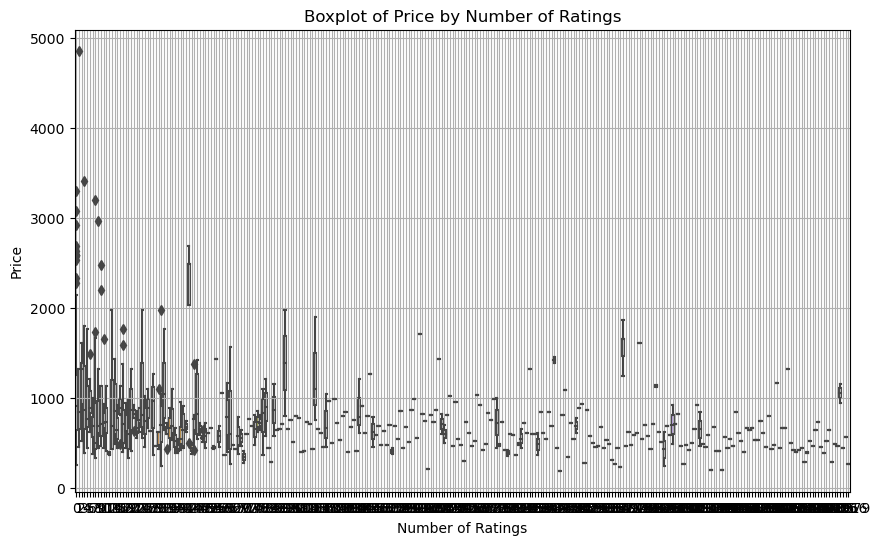

In [38]:
# no of Rating Price Box Plots

plt.figure(figsize=(10, 6)) 

sns.boxplot(x='Number of Ratings', y='Price', data=df)
plt.title('Boxplot of Price by Number of Ratings')
plt.grid()

plt.show()

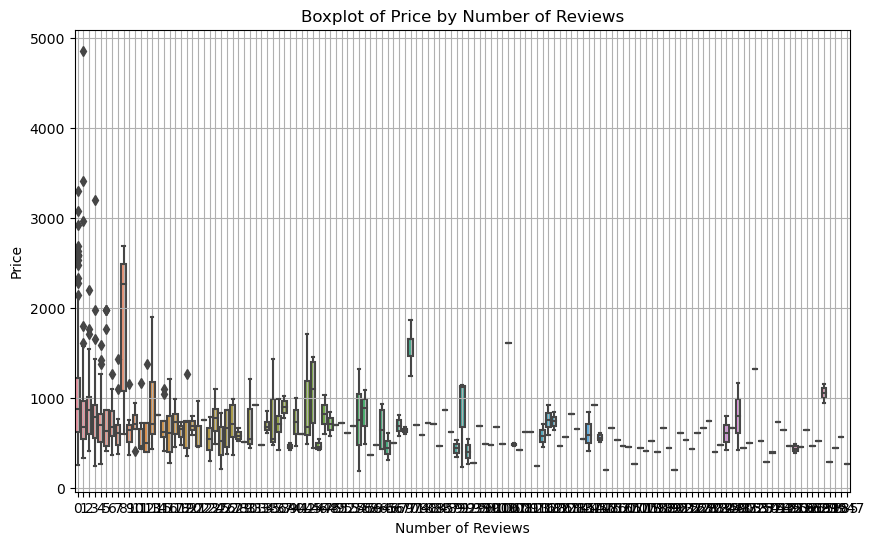

In [39]:
# no of reviews Price Box Plots

plt.figure(figsize=(10, 6)) 

sns.boxplot(x='Number of Reviews', y='Price', data=df)
plt.title('Boxplot of Price by Number of Reviews')
plt.grid()

plt.show()

In [40]:
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'object']

In [41]:
#Perform one-hot encoding on categorical variables
df_dummies = pd.get_dummies(df, columns=categorical_variables)

In [42]:
df_dummies.head()

,Price,Number of Ratings,Number of Reviews,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,...,warranty_No warranty,Touchscreen_No,Touchscreen_Yes,msoffice_No,msoffice_Yes,rating_1 star,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,381.139,3,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,428.989,65,5,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
2,439.989,8,1,False,False,False,False,False,True,False,...,True,True,False,True,False,False,False,True,False,False
3,769.890,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False
4,296.890,0,0,False,True,False,False,False,False,False,...,True,True,False,True,False,False,False,True,False,False


**Linear Regression**

In [43]:
# drop 'Price' column
X = df_dummies.drop('Price', axis=1) 
# the column to be predicted
y = df_dummies['Price'] 

In [44]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# initialize the model
model = LinearRegression()

In [45]:
# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


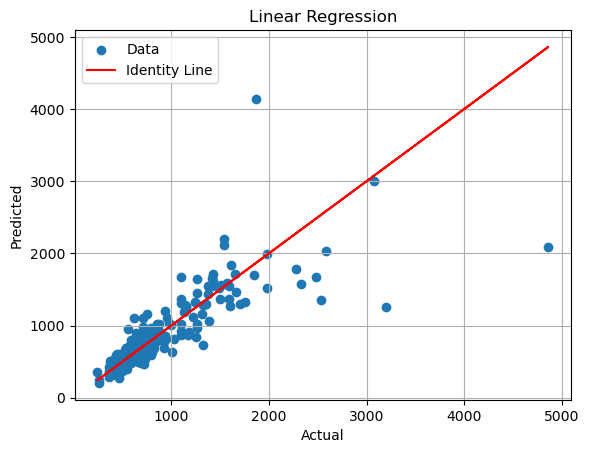

In [46]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred,label='Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title("Linear Regression")
# Plotting the identity line
plt.plot(y_test, y_test, color='red',label='Identity Line')
plt.grid()
plt.legend(loc='best')
plt.show()

In [47]:
mse = MSE(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 109095.62129169892, RMSE: 330.29626290907214


In [48]:
#Evaluation of MLR Model
print("R^2 on training data ",model.score(X_train, y_train))
print("R^2 on testing data ",model.score(X_test,y_test))

R^2 on training data  0.8391975241818365
R^2 on testing data  0.6362746695547964


In [49]:
mae = MAE(y_test, y_pred)

print(f"MAE: {mae}")

MAE: 162.32774884919843


In [50]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the model
model = LinearRegression()

In [51]:
# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


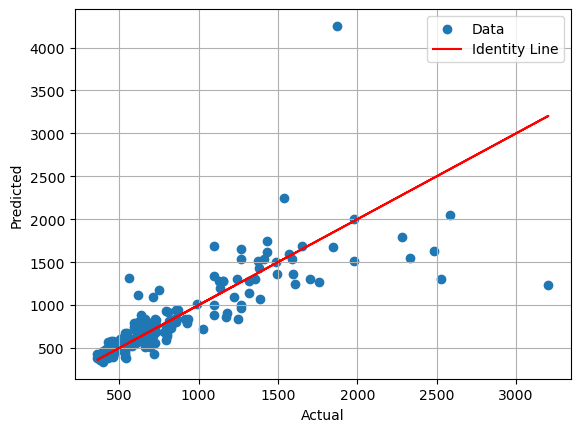

In [52]:
#Visualize MLR-trained model
plt.scatter(y_test, y_pred, label='Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red',label='Identity Line')
plt.grid()
plt.legend(loc='best')
plt.show()

In [53]:
mse = MSE(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 112675.47696800895, RMSE: 335.6716803187438


In [54]:
#Evaluation of MLR Model
print("R^2 on training data ",model.score(X_train, y_train))
print("R^2 on testing data ",model.score(X_test,y_test))

R^2 on training data  0.8609488668838765
R^2 on testing data  0.5622543167760123


In [55]:
mae = MAE(y_test, y_pred)

print(f"MAE: {mae}")

MAE: 173.04492935920217


**Random Forest Regressor**

In [56]:
from sklearn.ensemble import RandomForestRegressor as randomForestRegressor 
rfr=randomForestRegressor() 
rfr.fit(X_train,y_train)
rfrtd=rfr.predict(X_test)
rfrr2=r2_score(y_test,rfrtd)
print(f"R^2: {rfrr2}")
#rfrr2

R^2: 0.7248352619522374


In [57]:
rfmse = MSE(y_test, rfrtd)
rfrmse = rfmse**.5
print(f"MSE: {rfmse}, RMSE: {rfrmse}")
#print(rfmse)
#print(rfrmse)

MSE: 70827.2389483381, RMSE: 266.1338741091372


Top 20 Most Important Features:
                   Feature  Importance
43             ssd_1024 GB    0.241022
32            ram_gb_16 GB    0.112298
17  processor_name_Core i9    0.091078
15  processor_name_Core i5    0.037296
47             ssd_3072 GB    0.035737
55              os_Windows    0.034344
24    processor_gnrtn_10th    0.030739
16  processor_name_Core i7    0.027067
0        Number of Ratings    0.026336
62    graphic_card_gb_8 GB    0.025069
48              ssd_512 GB    0.022694
37           ram_type_DDR4    0.020489
14  processor_name_Core i3    0.015043
1        Number of Reviews    0.014409
39         ram_type_LPDDR3    0.013423
23  processor_name_Ryzen 9    0.013061
12      processor_brand_M1    0.010873
22  processor_name_Ryzen 7    0.010758
58    graphic_card_gb_0 GB    0.010065
38           ram_type_DDR5    0.009233


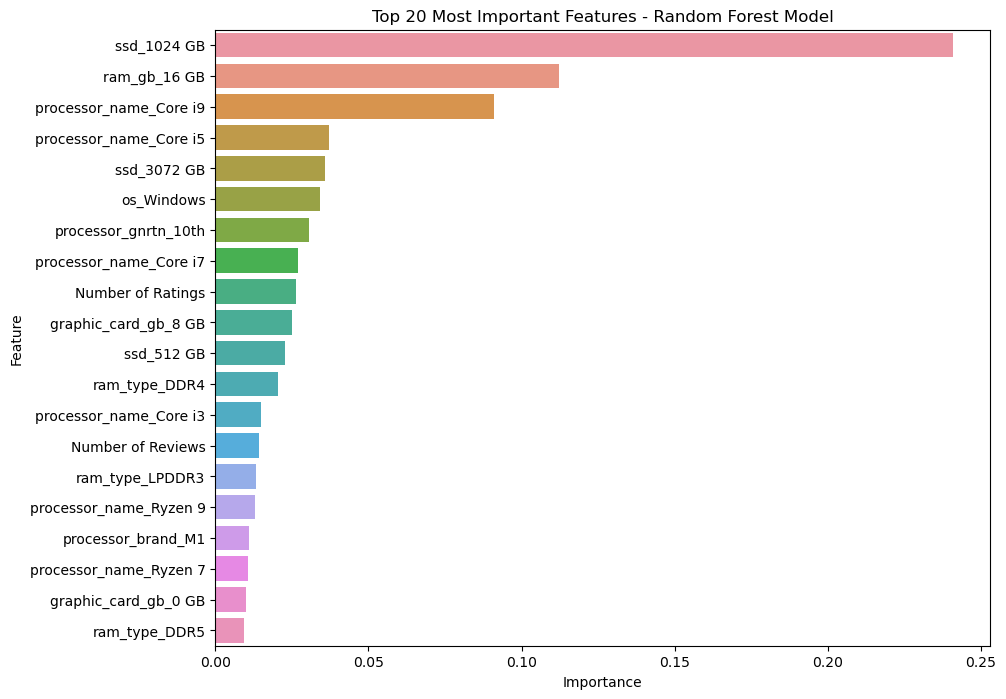

In [58]:
# Get the top 20 feature importances from the trained RF model
feature_importances = rfr.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)

print("Top 20 Most Important Features:")
print(top_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Most Important Features - Random Forest Model')
plt.show()

**Machine learninig model**

--------------------------
Corr_LR: 0.771
MAE_LR:  173.045
MSE_LR:  112675.477
RMSE_LR: 335.672
R2_LR:   0.562
--------------------------
--------------------------
Corr_RF: 0.852
MAE_RF:  143.261
MSE_RF:  70610.432
RMSE_RF: 265.726
R2_RF:   0.726
--------------------------
*************Confidence********
--------------------------
confidence_LR: 0.5622543167760123
--------------------------
confidence_RF: 0.7256775605337312
--------------------------


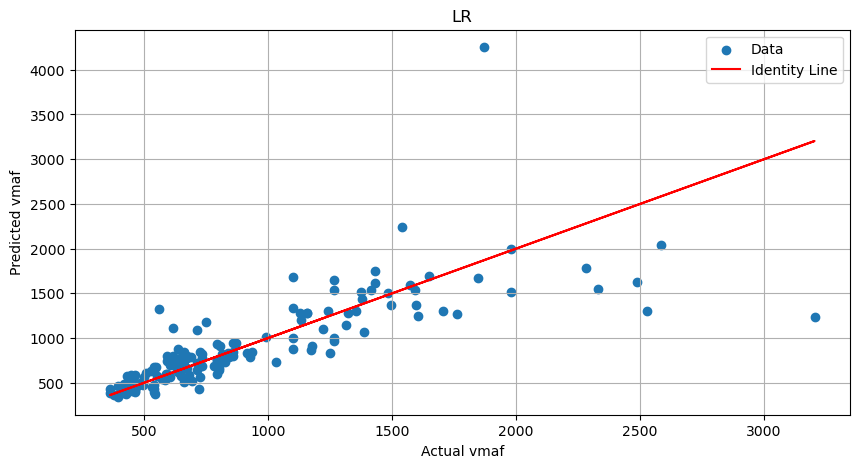

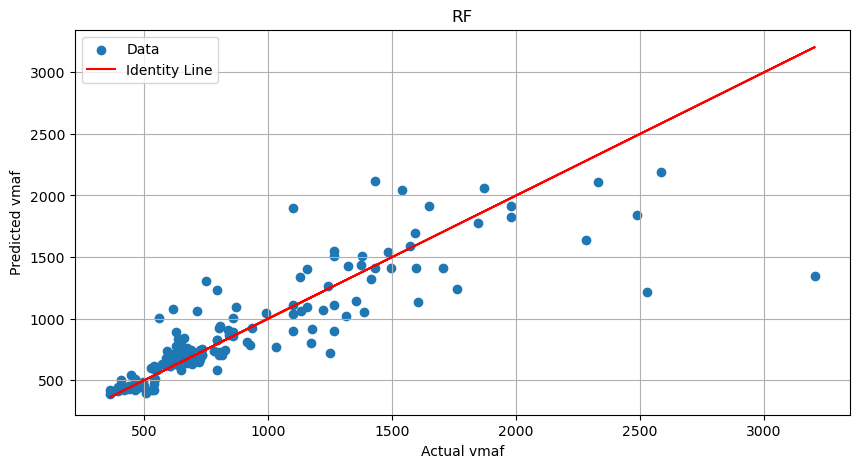

In [59]:
def ML_model(X_train,y_train,X_test,y_test):
    
    LR = LinearRegression()
    RF = RandomForestRegressor(n_estimators=1000)

    LR.fit(X_train, y_train)
    RF.fit(X_train, y_train)

    predict_LR=LR.predict(X_test)
    predict_RF=RF.predict(X_test)
    
    Result_lr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_LR":predict_LR})], axis = 1)
    Result_rf = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_RF":predict_RF})], axis = 1)
    

    Result_lr.to_csv('LinearRegression.csv')
    Result_rf.to_csv('RF.csv')



    confidence_LR = LR.score(X_test, y_test)
    confidence_RF = RF.score(X_test, y_test)
    
    lst1 =["LR","RF"]
    lst = [predict_LR,predict_RF]
    for idx, val in enumerate(lst):
        Corr = np.corrcoef(y_test,val)[0][1]
        MSE1 = MSE(y_test, val)
        MAE1 = MAE(y_test, val)
        RMSE = sqrt(MSE1)
        R2 = r2_score(y_test,val)
        
        print("--------------------------")
        print('Corr_{}: {:.3f}' .format(lst1[idx],Corr)) 
        print('MAE_{}:  {:.3f}' .format(lst1[idx],MAE1))
        print('MSE_{}:  {:.3f}' .format(lst1[idx],MSE1))
        print('RMSE_{}: {:.3f}' .format(lst1[idx],RMSE))
        print('R2_{}:   {:.3f}' .format(lst1[idx],R2))
        print("--------------------------")
        
        figure = plt.subplots(figsize=(10,5))
        plt.scatter(y_test,val,label='Data')
        plt.xlabel('Actual vmaf')
        plt.ylabel('Predicted vmaf')
        plt.plot(y_test, y_test, color='red',label='Identity Line')
        plt.grid()
        plt.legend(loc='best')
        plt.title('%s' %lst1[idx])

        
    print("*************Confidence********")
    
    print("--------------------------")
    print('confidence_LR:',confidence_LR)
    print("--------------------------")
    print('confidence_RF:',confidence_RF)
    print("--------------------------")
    


ML_model(X_train,y_train,X_test,y_test)

# please add the plot i thios section more than two plot with using three section in each part 

In [60]:
df_1 = df

(802, 19)


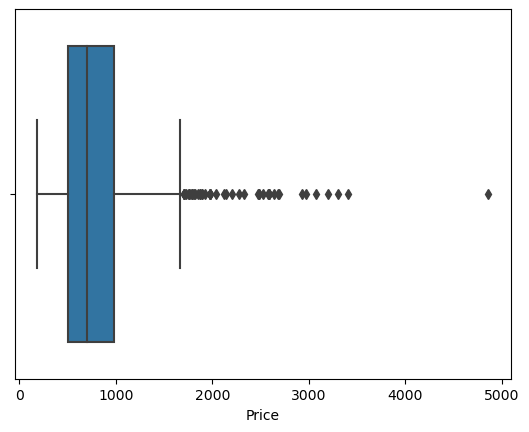

In [61]:
sns.boxplot(x= df_1['Price'])
print(df_1.shape)

(802, 19)


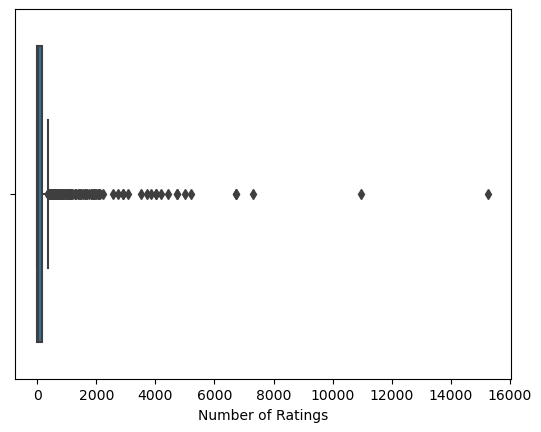

In [62]:
sns.boxplot(x= df_1['Number of Ratings'])
print(df_1.shape)

(802, 19)


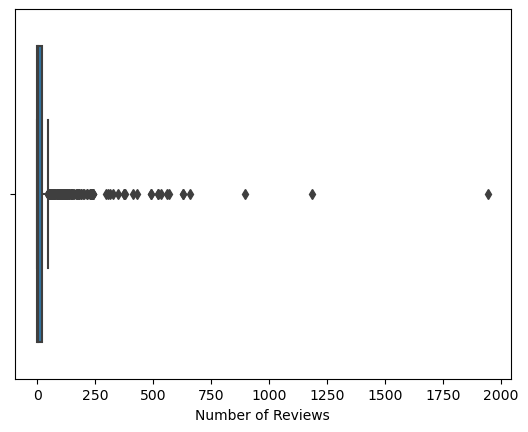

In [63]:
sns.boxplot(x= df_1['Number of Reviews'])
print(df_1.shape)

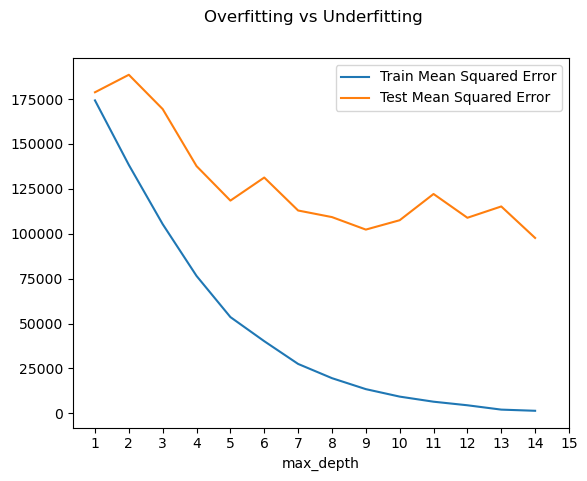

In [64]:

from sklearn.tree import DecisionTreeRegressor
md_list = []
score_train_list = []
score_test_list = []
mse_train_list = []
mse_test_list = []

for maxdepth in list(range(1,15)):
  tree_model = DecisionTreeRegressor(random_state=0, max_depth=maxdepth)
  tree_model.fit(X_train, y_train)

  pred_train = tree_model.predict(X_train)
  pred_test = tree_model.predict(X_test)

  # Lists generation
  md_list.append(maxdepth)
  score_train_list.append(100.0*tree_model.score(X_train, y_train))
  score_test_list.append(100.0*tree_model.score(X_test, y_test))
  mse_train_list.append(MSE(y_train, pred_train))
  mse_test_list.append(MSE(y_test, pred_test))

df_maxdepth = pd.DataFrame({"max_depth":md_list, 
                   "score_train":score_train_list,
                   "score_test":score_test_list,
                   "mse_train":mse_train_list,
                   "mse_test":mse_test_list
                   })
df_maxdepth.set_index("max_depth", inplace=True)

df_maxdepth["mse_train"].plot(label="Train Mean Squared Error")
df_maxdepth["mse_test"].plot(label="Test Mean Squared Error")
plt.xticks(range(1,16))
plt.suptitle("Overfitting vs Underfitting")
plt.legend()
plt.show()

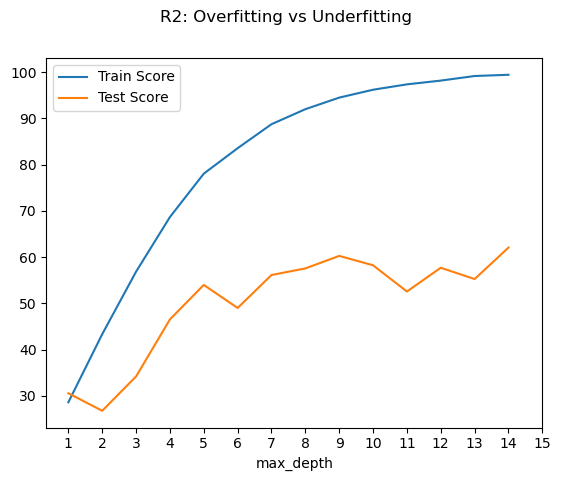

In [65]:
df_maxdepth["score_train"].plot(label="Train Score")
df_maxdepth["score_test"].plot(label="Test Score")
plt.suptitle("R2: Overfitting vs Underfitting")
plt.xticks(range(1,16))
plt.legend()
plt.show();

In [66]:
#AD with max_depth = 2:

tree_model = DecisionTreeRegressor(random_state=0, max_depth=2)
tree_model.fit(X_train, y_train)

score_train = "{:.2f}%".format(tree_model.score(X_train, y_train)*100.00)
score_test = "{:.2f}%".format(tree_model.score(X_test, y_test)*100.00)
mse_train = "{:.2f}".format(MSE(y_train, tree_model.predict(X_train)))
mse_test = "{:.2f}".format(MSE(y_test, tree_model.predict(X_test)))

print("Train score: ",score_train)
print("Test score: ",score_test)

models_overview = pd.DataFrame([["Decission Tree",score_train, score_test, mse_train, mse_test]],\
    columns=["Model","Train Score","Test Score","MSE Train", "MSE Test"])

Train score:  43.34%
Test score:  26.77%


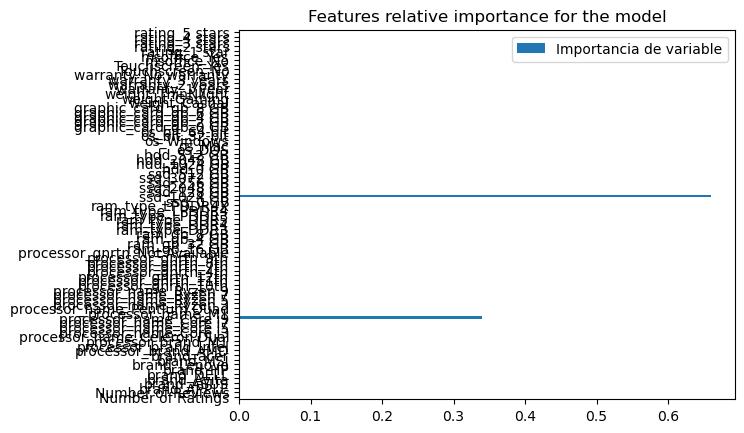

In [67]:
df_AD_imp = pd.DataFrame(tree_model.feature_importances_.reshape(1,-1), columns=X_train.columns, index=["Importancia de variable"])
df_AD_imp = df_AD_imp.head(10)
df_AD_imp.T.plot.barh()
plt.legend()
plt.title("Features relative importance for the model")
plt.show()

In [68]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)
score_train = xgb_model.score(X_train, y_train)
score_train = "{:.2f}%".format(score_train*100)
print('Training Score:', score_train)
score_test = xgb_model.score(X_test, y_test)
score_test = "{:.2f}%".format(score_test*100)
print('Testing Score:',  score_test)
output = pd.DataFrame({'Predicted':Y_pred})

mse_train = "{:.2f}".format(mean_squared_error(y_train, xgb_model.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test, xgb_model.predict(X_test)))

models_overview.loc[len(models_overview),:] = ["XGBoost", score_train,\
    score_test, mse_train, mse_test ]

Training Score: 99.66%
Testing Score: 70.52%


In [69]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=1050)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse_train = "{:.2f}".format(mean_squared_error(y_train.values.ravel(), random_forest.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test.values.ravel(), Y_pred))
r2 = r2_score(y_test.values.ravel(), Y_pred)
score_train = format(random_forest.score(X_train, y_train),'.2%')
score_test = format(random_forest.score(X_test, y_test),'.2%')

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', mse_test)
print('R-squared:', round(r2, 2))
print('Train score: ', score_train)
print('Test score: ', format(random_forest.score(X_test, y_test.values.ravel()),'.2%'))


models_overview.loc[len(models_overview),:] = ["Random Forest", score_train,\
    score_test, mse_train, mse_test ]

Mean Absolute Error: 144.07
Mean Squared Error: 70825.45
R-squared: 0.72
Train score:  96.03%
Test score:  72.48%


In [70]:
models_overview

,Model,Train Score,Test Score,MSE Train,MSE Test
0,Decission Tree,43.34%,26.77%,138293.12,188481.31
1,XGBoost,99.66%,70.52%,821.75,75872.18
2,Random Forest,96.03%,72.48%,9693.24,70825.45


**Label Encoding**

In [71]:
df_2=df

In [72]:
df_2["processor_name"].unique()

array(['Core i3', 'Core i5', 'Celeron Dual', 'Ryzen 5', 'Core i7',
       'Core i9', 'M1', 'Pentium Quad', 'Ryzen 3', 'Ryzen 7', 'Ryzen 9'],
      dtype=object)

In [73]:
df_2 = df_2.replace({"processor_name":{
    "Core i3":1,
    "Core i5":2,
    "Celeron Dual":3,
    "Ryzen 5":4,
    "Core i7":5,
    "Core i9":6,
    "M1":7,
    "Pentium Quad":8,
    "Ryzen 3":9,
    "Ryzen 7":10,
    "Ryzen 9":11,
}})

In [74]:
df_2

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,1,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,381.139,2 stars,3,0
1,Lenovo,Intel,1,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,428.989,3 stars,65,5
2,Lenovo,Intel,1,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,439.989,3 stars,8,1
3,ASUS,Intel,2,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,769.890,3 stars,0,0
4,ASUS,Intel,3,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,296.890,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,11,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,1495.890,3 stars,0,0
819,ASUS,AMD,11,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,1594.890,3 stars,0,0
820,ASUS,AMD,11,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,1649.890,3 stars,0,0
821,ASUS,AMD,11,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,1572.890,3 stars,0,0


In [75]:
df_2["brand"].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [76]:
df_2["processor_brand"].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

In [77]:
df_2["processor_gnrtn"].unique()

array(['10th', 'Not Available', '11th', '7th', '8th', '9th', '4th',
       '12th'], dtype=object)

In [78]:
df_2["ram_gb"].unique()

array(['4 GB', '8 GB', '16 GB', '32 GB'], dtype=object)

In [79]:
categorical_variables = [feature for feature in df.columns if df[feature].dtype == 'object']

In [80]:
from sklearn.preprocessing import LabelEncoder as label_encoder

In [81]:
from sklearn import preprocessing   

In [82]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'brand' ]= my_label.fit_transform(df_2[ 'brand' ])   
print(df_2[ 'brand' ].unique())  
print("Data Frame after Label Encoding:\n")  


[1 5 7 2 4 3 6 0]
Data Frame after Label Encoding:



In [83]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'processor_brand' ]= my_label.fit_transform(df_2[ 'processor_brand' ])   
print(df_2[ 'processor_brand' ].unique())  
print("Data Frame after Label Encoding:\n")  


[1 0 2]
Data Frame after Label Encoding:



In [84]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'processor_gnrtn' ]= my_label.fit_transform(df_2[ 'processor_gnrtn' ])   
print(df_2[ 'processor_gnrtn' ].unique())  
print("Data Frame after Label Encoding:\n")  


[0 7 1 4 5 6 3 2]
Data Frame after Label Encoding:



In [85]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'ram_gb' ]= my_label.fit_transform(df_2[ 'ram_gb' ])   
print(df_2[ 'ram_gb' ].unique())  
print("Data Frame after Label Encoding:\n")  


[2 3 0 1]
Data Frame after Label Encoding:



In [86]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'ram_type' ]= my_label.fit_transform(df_2[ 'ram_type' ])   
print(df_2[ 'ram_type' ].unique())  
print("Data Frame after Label Encoding:\n")  


[1 4 5 2 0 3]
Data Frame after Label Encoding:



In [87]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'ssd' ]= my_label.fit_transform(df_2[ 'ssd' ])   
print(df_2[ 'ssd' ].unique())  
print("Data Frame after Label Encoding:\n")  


[0 6 4 2 1 3 5]
Data Frame after Label Encoding:



In [88]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'hdd' ]= my_label.fit_transform(df_2[ 'hdd' ])   
print(df_2[ 'hdd' ].unique())  
print("Data Frame after Label Encoding:\n")  


[1 0 3 2]
Data Frame after Label Encoding:



In [89]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'os' ]= my_label.fit_transform(df_2[ 'os' ])   
print(df_2[ 'os' ].unique())  
print("Data Frame after Label Encoding:\n")  


[2 0 1]
Data Frame after Label Encoding:



In [90]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'os_bit' ]= my_label.fit_transform(df_2[ 'os_bit' ])   
print(df_2[ 'os_bit' ].unique())  
print("Data Frame after Label Encoding:\n")  



[1 0]
Data Frame after Label Encoding:



In [91]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'graphic_card_gb' ]= my_label.fit_transform(df_2[ 'graphic_card_gb' ])   
print(df_2[ 'graphic_card_gb' ].unique())  
print("Data Frame after Label Encoding:\n")  


[0 1 2 3 4]
Data Frame after Label Encoding:



In [92]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'weight' ]= my_label.fit_transform(df_2[ 'weight' ])   
print(df_2[ 'weight' ].unique())  
print("Data Frame after Label Encoding:\n")  


[0 2 1]
Data Frame after Label Encoding:



In [93]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'warranty' ]= my_label.fit_transform(df_2[ 'warranty' ])   
print(df_2[ 'warranty' ].unique())  
print("Data Frame after Label Encoding:\n")  


[3 0 1 2]
Data Frame after Label Encoding:



In [94]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'Touchscreen' ]= my_label.fit_transform(df_2[ 'Touchscreen' ])   
print(df_2[ 'Touchscreen' ].unique())  
print("Data Frame after Label Encoding:\n")  


[0 1]
Data Frame after Label Encoding:



In [95]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'msoffice' ]= my_label.fit_transform(df_2[ 'msoffice' ])   
print(df_2[ 'msoffice' ].unique())  
print("Data Frame after Label Encoding:\n")  

[0 1]
Data Frame after Label Encoding:



In [96]:
my_label = preprocessing.LabelEncoder()   
   
df_2[ 'rating' ]= my_label.fit_transform(df_2[ 'rating' ])   
print(df_2[ 'rating' ].unique())  
print("Data Frame after Label Encoding:\n")  


[1 2 3 4 0]
Data Frame after Label Encoding:



In [97]:
df_2 = df_2.iloc[:,:17]

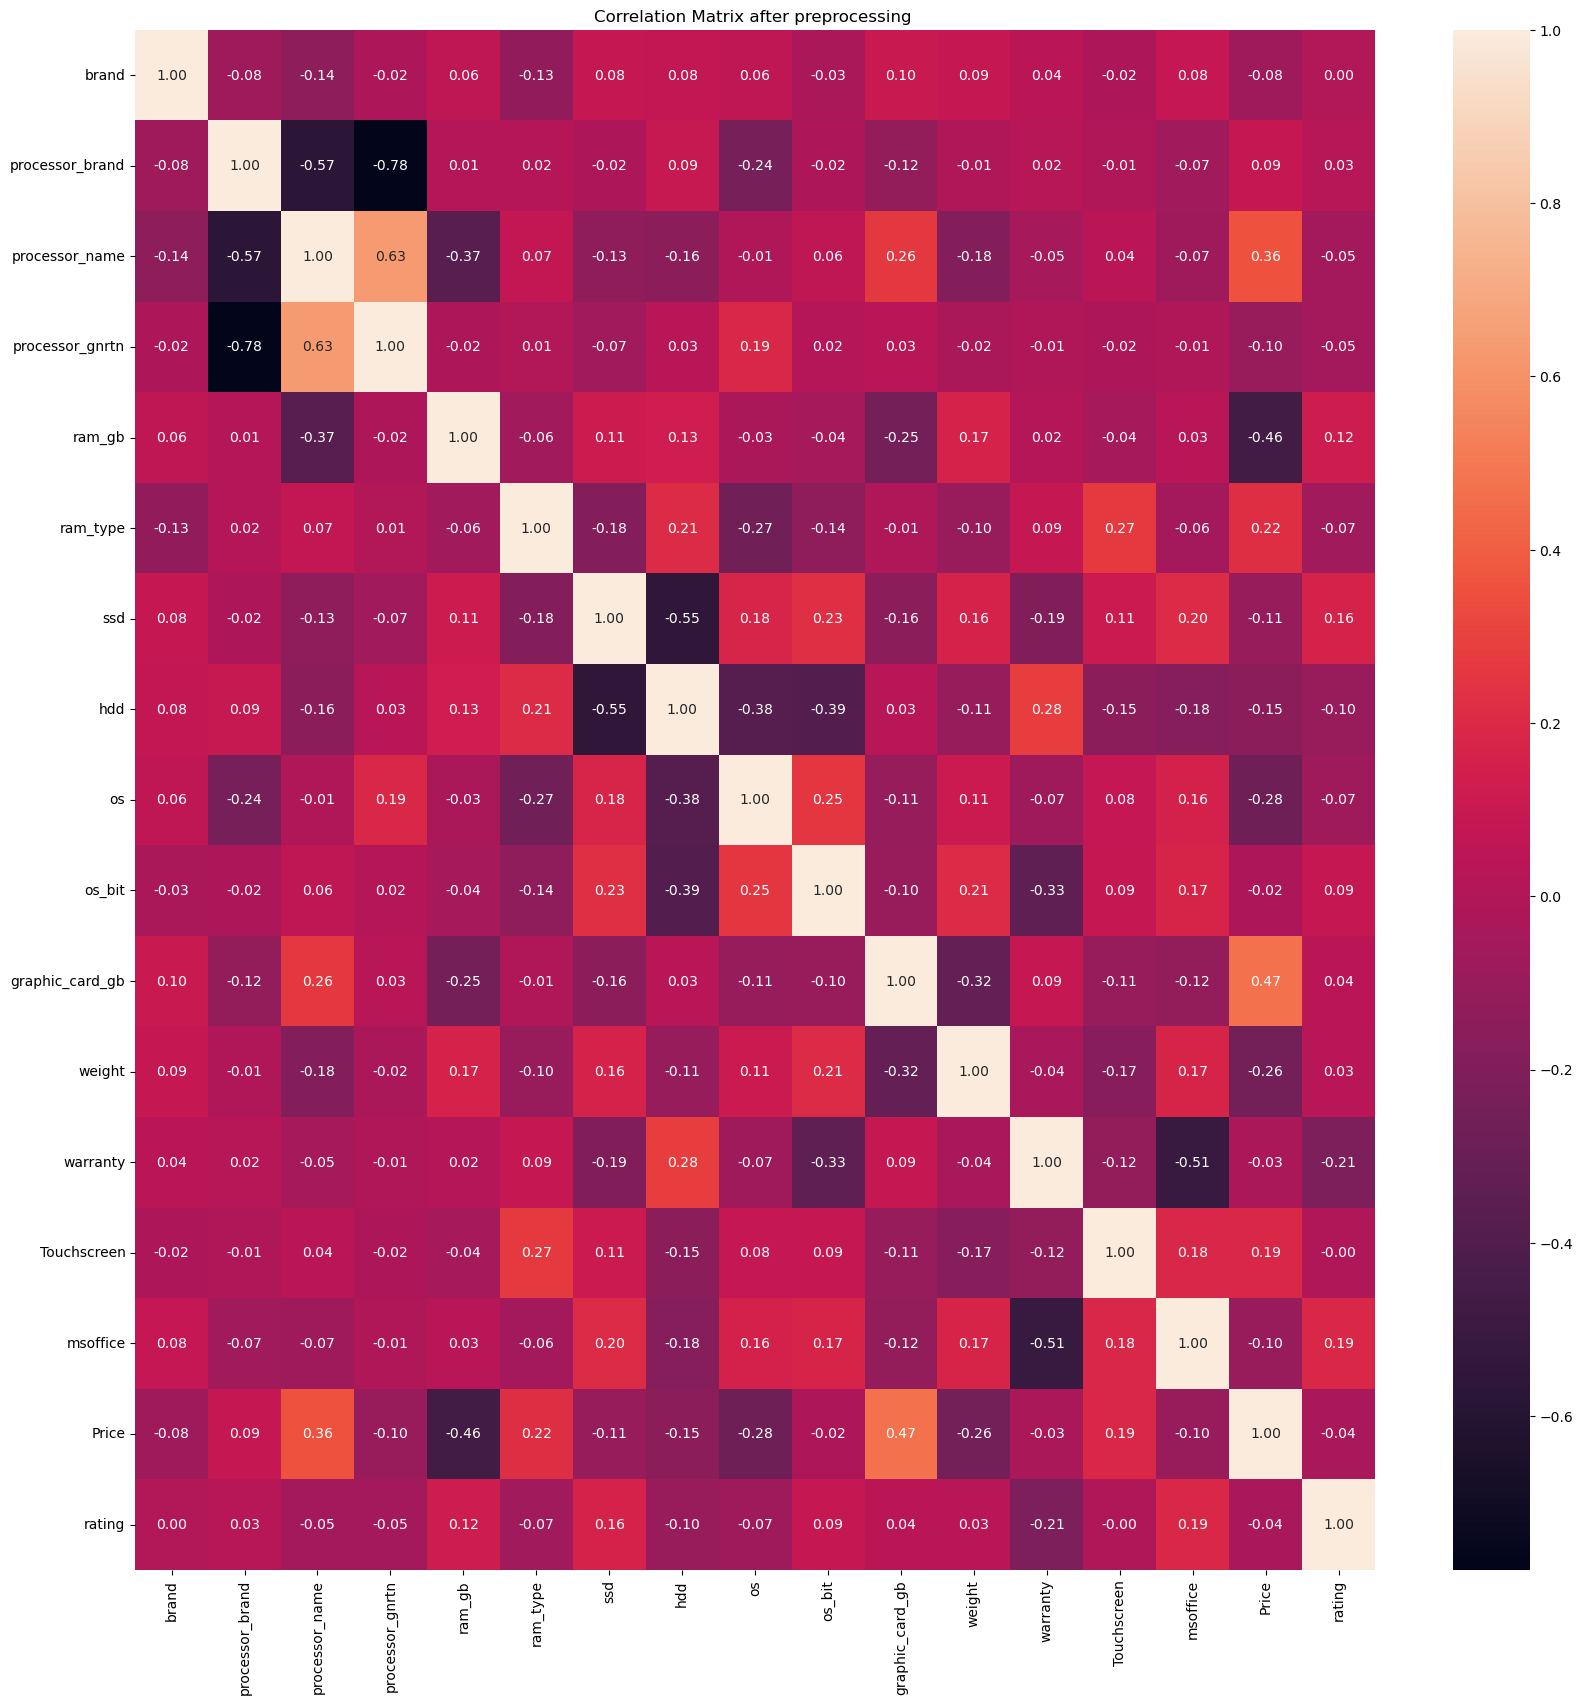

In [98]:
corrMat = df_2.corr(method='pearson') #correlation calculation
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrMat, annot=True, fmt='.2f', ax=ax) # base on the heatmap
plt.title("Correlation Matrix after preprocessing ")
plt.show()

In [99]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            802 non-null    int32  
 1   processor_brand  802 non-null    int32  
 2   processor_name   802 non-null    int64  
 3   processor_gnrtn  802 non-null    int32  
 4   ram_gb           802 non-null    int32  
 5   ram_type         802 non-null    int32  
 6   ssd              802 non-null    int32  
 7   hdd              802 non-null    int32  
 8   os               802 non-null    int32  
 9   os_bit           802 non-null    int32  
 10  graphic_card_gb  802 non-null    int32  
 11  weight           802 non-null    int32  
 12  warranty         802 non-null    int32  
 13  Touchscreen      802 non-null    int32  
 14  msoffice         802 non-null    int32  
 15  Price            802 non-null    float64
 16  rating           802 non-null    int32  
dtypes: float64(1), int32(

Linear Regression on Label encoded data

In [100]:
# drop 'Price' column
X = df_2.drop('Price', axis=1) 
# the column to be predicted
y = df_2['Price'] 

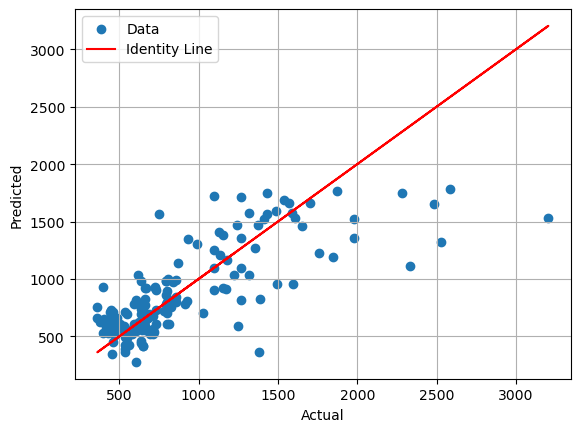

In [101]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize the model
model = LinearRegression()
# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#Visualize MLR-trained model
plt.scatter(y_test, y_pred,label='Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Plotting the identity line
plt.plot(y_test, y_test, color='red',label='Identity Line')
plt.grid()
plt.legend(loc='best')
plt.show()

In [102]:
mse = MSE(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}, RMSE: {rmse}")
#Evaluation of MLR Model
print("R^2 on training data ",model.score(X_train, y_train))
print("R^2 on testing data ",model.score(X_test,y_test))
mae = MAE(y_test, y_pred)

print(f"MAE: {mae}")

MSE: 105201.01096173258, RMSE: 324.3470532650676
R^2 on training data  0.5571454035797911
R^2 on testing data  0.5912927137430906
MAE: 216.05585703691827


**RF Regressor**


In [103]:
from sklearn.ensemble import RandomForestRegressor as randomForestRegressor 
rfr=randomForestRegressor() 
rfr.fit(X_train,y_train)
rfrtd=rfr.predict(X_test)
rfrr2=r2_score(y_test,rfrtd)
print(f"R^2: {rfrr2}")
#rfrr2
rfmse = MSE(y_test, rfrtd)
rfrmse = rfmse**.5
print(f"MSE: {rfmse}, RMSE: {rfrmse}")
#print(rfmse)
#print(rfrmse)



R^2: 0.7425729180847873
MSE: 66261.57687187864, RMSE: 257.4132414462757


Top 20 Most Important Features:
            Feature  Importance
2    processor_name    0.236367
4            ram_gb    0.204528
10  graphic_card_gb    0.120252
6               ssd    0.090975
15           rating    0.070422
3   processor_gnrtn    0.063883
0             brand    0.048518
5          ram_type    0.038689
8                os    0.024586
13      Touchscreen    0.022869
11           weight    0.016692
12         warranty    0.015324
1   processor_brand    0.014237
14         msoffice    0.014184
7               hdd    0.010195
9            os_bit    0.008278


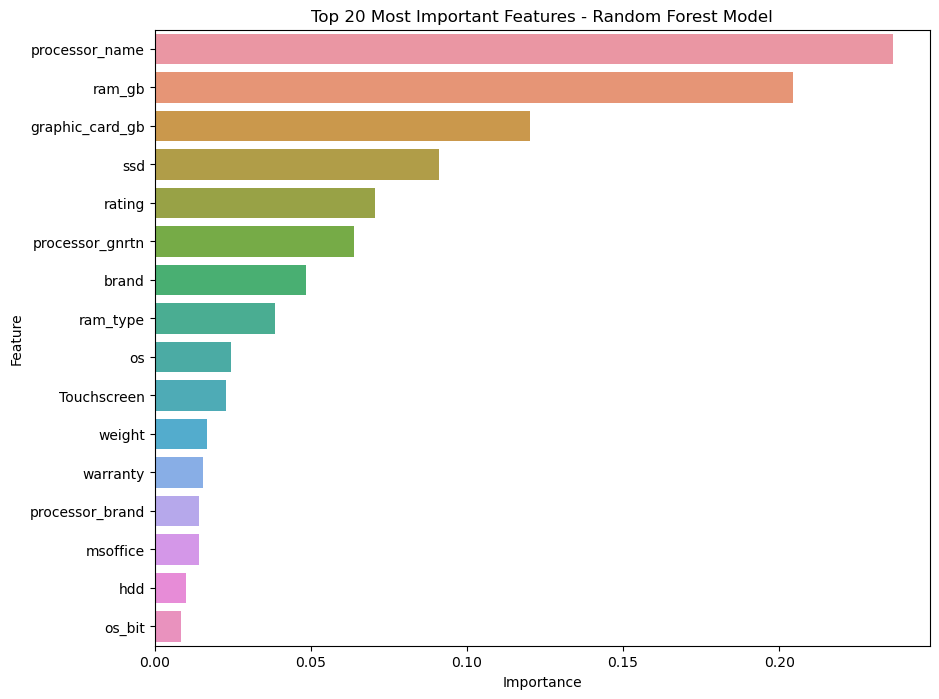

In [104]:
# Get the top 20 feature importances from the trained RF model
feature_importances = rfr.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)

print("Top 20 Most Important Features:")
print(top_features)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 20 Most Important Features - Random Forest Model')
plt.show()

**Machine learninig model**

--------------------------
Corr_Linear Regression: 0.771
MAE_Linear Regression:  216.056
MSE_Linear Regression:  105201.011
RMSE_Linear Regression: 324.347
R2_Linear Regression:   0.591
--------------------------
--------------------------
Corr_Random Forest Regressor: 0.862
MAE_Random Forest Regressor:  136.142
MSE_Random Forest Regressor:  67120.234
RMSE_Random Forest Regressor: 259.076
R2_Random Forest Regressor:   0.739
--------------------------
--------------------------
Corr_XGBoost Regressor: 0.846
MAE_XGBoost Regressor:  145.613
MSE_XGBoost Regressor:  73845.669
RMSE_XGBoost Regressor: 271.746
R2_XGBoost Regressor:   0.713
--------------------------
*************Confidence********
--------------------------
confidence_LR: 0.5912927137430906
--------------------------
confidence_RF: 0.7392370258286993
--------------------------
confidence_XGB: 0.7131086214093328
--------------------------


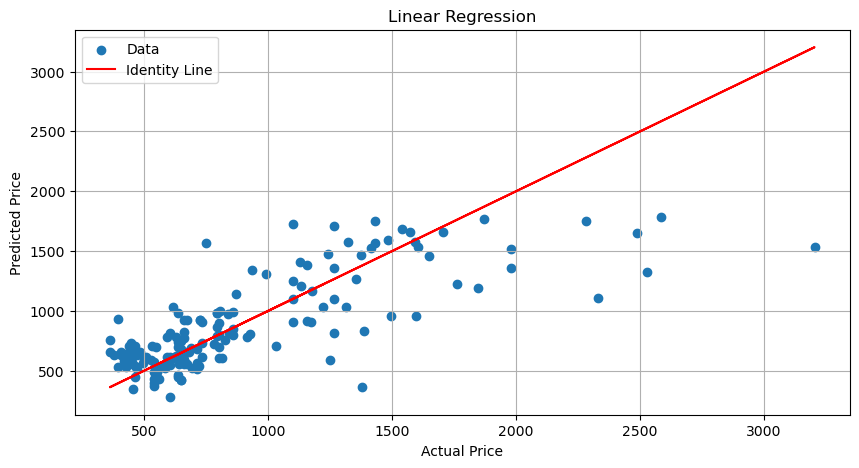

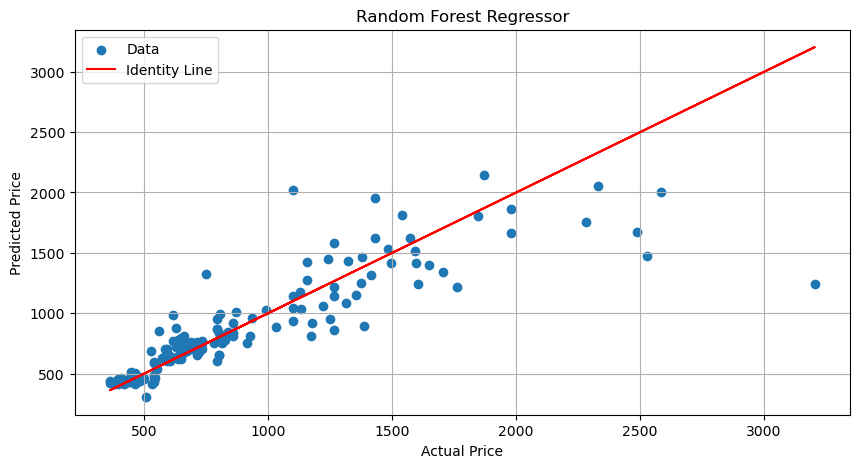

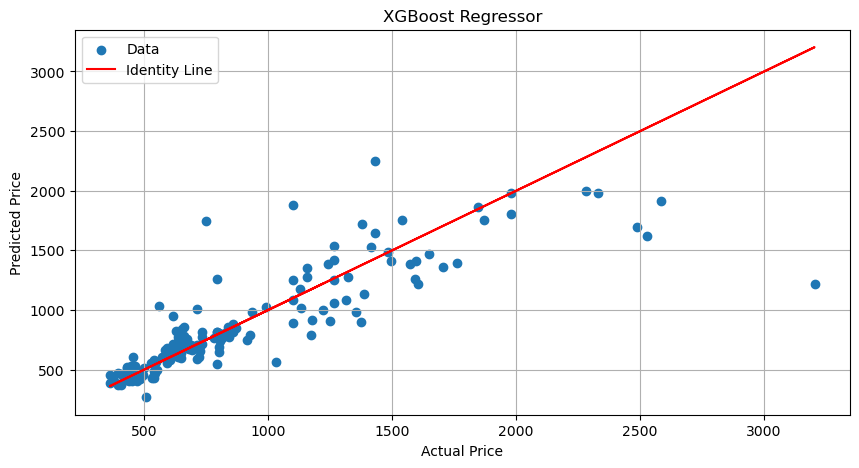

In [105]:
from xgboost import XGBRegressor
def ML_model(X_train,y_train,X_test,y_test):
    
    LR = LinearRegression()
    RF = RandomForestRegressor(n_estimators=1000)
    XGB= XGBRegressor()
    
    LR.fit(X_train, y_train)
    RF.fit(X_train, y_train)
    XGB.fit(X_train, y_train)

    predict_LR=LR.predict(X_test)
    predict_RF=RF.predict(X_test)
    predict_XGB=XGB.predict(X_test) 
    
    Result_lr = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_LR":predict_LR})], axis = 1)
    Result_rf = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_RF":predict_RF})], axis = 1)
    Result_xgb = pd.concat([pd.DataFrame({"y_test":y_test}) ,pd.DataFrame({"predict_XGB":predict_XGB})], axis = 1)

    Result_lr.to_csv('LinearRegression.csv')
    Result_rf.to_csv('RF.csv')
    Result_xgb.to_csv('XGB.csv')


    confidence_LR = LR.score(X_test, y_test)
    confidence_RF = RF.score(X_test, y_test)
    confidence_XGB = XGB.score(X_test, y_test)
    
    lst1 =["Linear Regression","Random Forest Regressor","XGBoost Regressor"]
    lst = [predict_LR,predict_RF,predict_XGB]
    for idx, val in enumerate(lst):
        Corr = np.corrcoef(y_test,val)[0][1]
        MSE1 = MSE(y_test, val)
        MAE1 = MAE(y_test, val)
        RMSE = sqrt(MSE1)
        R2 = r2_score(y_test,val)
        
        print("--------------------------")
        print('Corr_{}: {:.3f}' .format(lst1[idx],Corr)) 
        print('MAE_{}:  {:.3f}' .format(lst1[idx],MAE1))
        print('MSE_{}:  {:.3f}' .format(lst1[idx],MSE1))
        print('RMSE_{}: {:.3f}' .format(lst1[idx],RMSE))
        print('R2_{}:   {:.3f}' .format(lst1[idx],R2))
        print("--------------------------")
        
        figure = plt.subplots(figsize=(10,5))
        plt.scatter(y_test,val,label='Data')
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.plot(y_test, y_test, color='red',label='Identity Line')
        plt.grid()
        plt.legend(loc='best')
        plt.title('%s' %lst1[idx])

        
    print("*************Confidence********")
    
    print("--------------------------")
    print('confidence_LR:',confidence_LR)
    print("--------------------------")
    print('confidence_RF:',confidence_RF)
    print("--------------------------")
    print('confidence_XGB:',confidence_XGB)
    print("--------------------------")
    


ML_model(X_train,y_train,X_test,y_test)

# please add the plot i thios section more than two plot with using three section in each part 

In [106]:
#AD with max_depth = 2:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

mae = mean_absolute_error(y_test.values.ravel(), lr_model.predict(X_test))
score_train = "{:.2f}%".format(lr_model.score(X_train, y_train)*100.00)
score_test = "{:.2f}%".format(lr_model.score(X_test, y_test)*100.00)
mse_train = "{:.2f}".format(MSE(y_train, lr_model.predict(X_train)))
mse_test = "{:.2f}".format(MSE(y_test, lr_model.predict(X_test)))
r2 = r2_score(y_test.values.ravel(), lr_model.predict(X_test))

print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', mse_test)
print('R-squared:', round(r2, 2))
print("Train score: ",score_train)
print("Test score: ",score_test)

models_overview = pd.DataFrame([["Linear Regression",score_train, score_test, r2, mse_train, mse_test]],\
    columns=["Model","Train Score","Test Score","R-squared", "MSE Train", "MSE Test"])

Mean Absolute Error: 216.06
Mean Squared Error: 105201.01
R-squared: 0.59
Train score:  55.71%
Test score:  59.13%


In [107]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=1050)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse_train = "{:.2f}".format(mean_squared_error(y_train.values.ravel(), random_forest.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test.values.ravel(), Y_pred))
r2 = r2_score(y_test.values.ravel(), Y_pred)
score_train = format(random_forest.score(X_train, y_train),'.2%')
score_test = format(random_forest.score(X_test, y_test),'.2%')
# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', mse_test)
print('R-squared:', round(r2, 2))
print('Train score: ', score_train)
print('Test score: ', format(random_forest.score(X_test, y_test.values.ravel()),'.2%'))


models_overview.loc[len(models_overview),:] = ["Random Forest", score_train,\
    score_test, r2, mse_train, mse_test ]

Mean Absolute Error: 136.19
Mean Squared Error: 66774.56
R-squared: 0.74
Train score:  95.16%
Test score:  74.06%


Top 20 Most Important Features:
            Feature  Importance
2    processor_name    0.235632
4            ram_gb    0.206366
10  graphic_card_gb    0.130177
6               ssd    0.089582
3   processor_gnrtn    0.064643
15           rating    0.063329
0             brand    0.044133
5          ram_type    0.038087
8                os    0.026724
13      Touchscreen    0.023079
12         warranty    0.016040
11           weight    0.015462
1   processor_brand    0.014258
14         msoffice    0.013246
7               hdd    0.010783
9            os_bit    0.008460


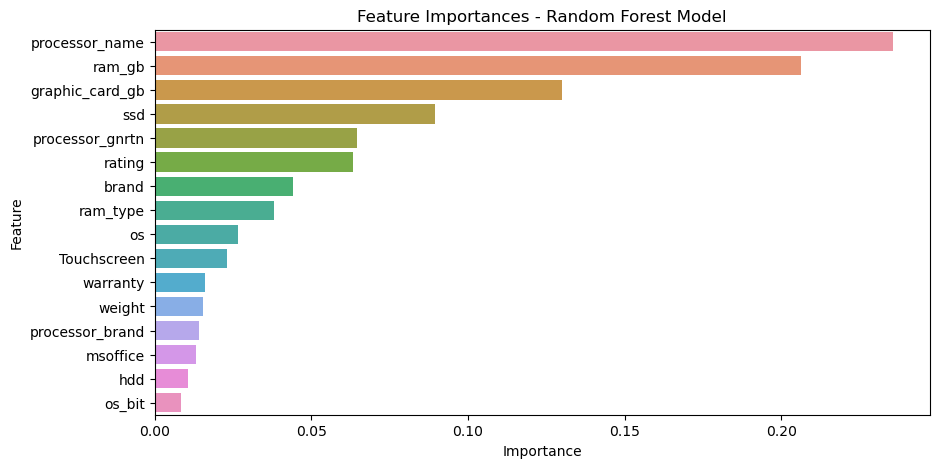

In [108]:
# Get the top 20 feature importances from the trained RF model
feature_importances = random_forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)

print("Top 20 Most Important Features:")
print(top_features)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importances - Random Forest Model')
plt.show()

In [109]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
Y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test.values.ravel(), Y_pred)
mse_test = "{:.2f}".format(mean_squared_error(y_test.values.ravel(), Y_pred))
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', mse_test)
r2 = r2_score(y_test.values.ravel(), Y_pred)
print('R-squared:', round(r2, 2))
score_train = xgb_model.score(X_train, y_train)
score_train = "{:.2f}%".format(score_train*100)
print('Training Score:', score_train)
score_test = xgb_model.score(X_test, y_test)
score_test = "{:.2f}%".format(score_test*100)
print('Testing Score:',  score_test)
output = pd.DataFrame({'Predicted':Y_pred})

mse_train = "{:.2f}".format(mean_squared_error(y_train, xgb_model.predict(X_train)))
mse_test = "{:.2f}".format(mean_squared_error(y_test, xgb_model.predict(X_test)))

models_overview.loc[len(models_overview),:] = ["XGBoost", score_train,\
    score_test, r2, mse_train, mse_test ]

Mean Absolute Error: 145.61
Mean Squared Error: 73845.67
R-squared: 0.71
Training Score: 99.03%
Testing Score: 71.31%


Top 20 Most Important Features:
            Feature  Importance
4            ram_gb    0.272851
8                os    0.252846
10  graphic_card_gb    0.089287
2    processor_name    0.084838
6               ssd    0.050241
1   processor_brand    0.040505
13      Touchscreen    0.036817
3   processor_gnrtn    0.031706
15           rating    0.031002
11           weight    0.026854
5          ram_type    0.026650
0             brand    0.017984
9            os_bit    0.011166
14         msoffice    0.010654
7               hdd    0.008875
12         warranty    0.007725


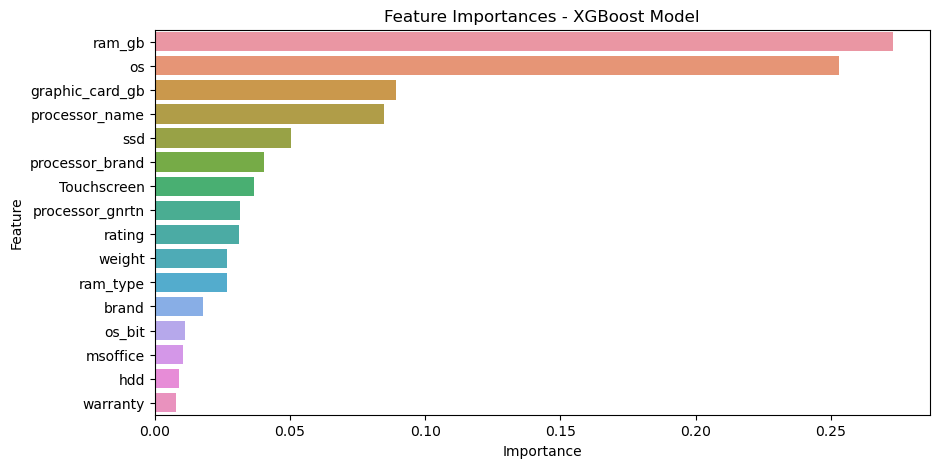

In [110]:
# Get the top 20 feature importances from the trained LR model
feature_importances = xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(20)

print("Top 20 Most Important Features:")
print(top_features)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importances - XGBoost Model')
plt.show()

In [111]:
models_overview

,Model,Train Score,Test Score,R-squared,MSE Train,MSE Test
0,Linear Regression,55.71%,59.13%,0.591293,108083.12,105201.01
1,Random Forest,95.16%,74.06%,0.740580,11802.75,66774.56
2,XGBoost,99.03%,71.31%,0.713109,2359.36,73845.67
